# Step 1: Importing the libraries

#### For data analysis and data manipulation:

- Numpy: used for numerical computing and operating on large multi-dimensional arrays and matrices
- Pandas: used for data manipulation and analysis of structured data
- Matplotlib: used for creating static, interactive, and animated visualizations
- Seaborn: based on Matplotlib, provides higher-level interface for creating statistical graphics

#### For dealing with files:

- OS: provides a way of using operating system-dependent functionality like reading or writing to the file system
- shutil: provides a way of operating with high-level file operations, such as copying, moving, and deleting files and directories
- glob: provides a way of finding all the pathnames matching a specified pattern according to the rules used by the Unix shell
- tqdm: used for adding progress bars to Python loops.

#### For neural network training:

- TensorFlow: an open-source software library for building and training machine learning models, including deep neural networks
- cv2: used for image processing and computer vision tasks
- Keras: high-level neural networks API, used for building and training neural networks in a very user-friendly way
- InceptionV3: pre-trained neural network model that was trained on the ImageNet dataset
- ImageDataGenerator: used for generating batches of image data with real-time data augmentation

#### For deployment and live feedback of model:

- pickle: used for serializing and deserializing Python objects
- histograms: a custom module that provides functions for computing histograms of images
- pygame: used for creating games and multimedia applications, provides a way of playing sounds and music in Python
- MTCNN: pre-trained neural network model that can be used for detecting faces in images

In [8]:
# For data analysis and data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import torch
import json
import numpy as np
%matplotlib inline 

# For dealing with files
import os
import shutil
import glob
from tqdm import tqdm

# For the neural network training
import tensorflow as tf
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  
from tensorflow.keras.models import load_model

# For deployment and live feedback of model
import pickle
from histograms import histograms
from pygame import mixer
from mtcnn import MTCNN

# Step 2: Exploratory data analysis

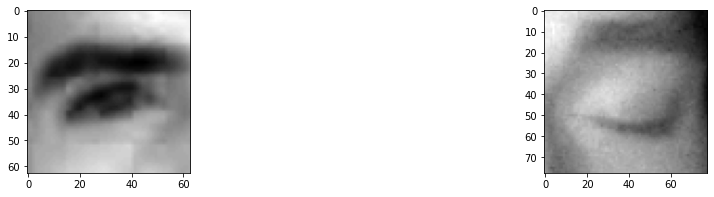

In [16]:
fig,ax = plt.subplots(1,2,figsize=(17,3))


open_eye_img = cv2.imread(r"C:\Users\YUVRAJ\Desktop\Artificial Intelligence\Deep-learning-projects\Driver drowsiness detection\Data\train_manually\open\s0012_06562_0_0_1_0_1_01.png",cv2.IMREAD_GRAYSCALE)
close_eye_img = cv2.imread(r"C:\Users\YUVRAJ\Desktop\Artificial Intelligence\Deep-learning-projects\Driver drowsiness detection\Data\train_manually\closed\s0001_00041_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)

ax[0].imshow(open_eye_img,cmap = "gray")
ax[1].imshow(close_eye_img,cmap = "gray")

In [4]:
# Let's create a tensorflow dataset of image paths
Images = tf.data.Dataset.list_files('data\\images\\*.jpg',shuffle=False)

In [5]:
# Function to load the image
def load_img(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

# Let's apply load_img function on every file path stored in Images tensorflow dataset
Images = Images.map(load_img) 

In [6]:
Image_numpy_iterator = Images.batch(4).as_numpy_iterator()
plot_images = Image_numpy_iterator.next()

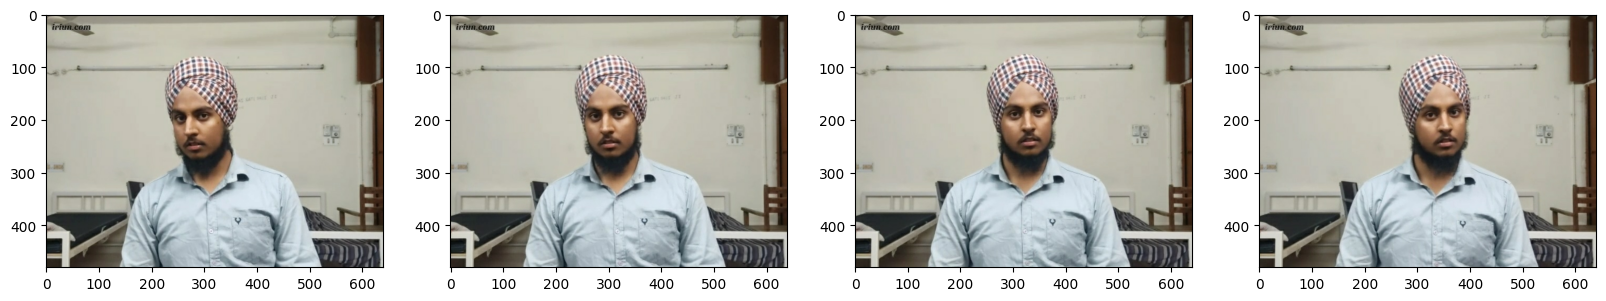

In [7]:
# let's plot the images
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [2]:
raw_data = (r'C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\raw_data')
for dirpath, dirname, filename in os.walk(raw_data):
    for file in tqdm([f for f in filename if f.endswith('.png')]):
        if file.split('_')[4] == '0':
            path=(r'C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\seperate_data\closed')
            if not os.path.exists(path):
                os.makedirs(path)
            shutil.copy(src=dirpath + '/' + file, dst= path)
        elif file.split('_')[4] == '1':
            path= (r'C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\seperate_data\open')
            if not os.path.exists(path):
                os.makedirs(path)
            shutil.copy(src=dirpath + '/' + file, dst= path)    

0it [00:00, ?it/s]
100%|████████████████████████████████████████████████████████████████████████████| 10257/10257 [01:51<00:00, 92.31it/s]


In [3]:
data_for_checking_distribution = []
open_eyes = []
raw_data = (r'C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\raw_data')
for dirpath, dirname, filename in os.walk(raw_data):
    for f in filename:
        if f.split('_')[4] == '0':
            data_for_checking_distribution.append(0)
        elif f.split('_')[4] == '1':
            data_for_checking_distribution.append(1)

In [ ]:
# Folder to traverse train data
y_train = []
train_data_folder = (r"C:\Users\YUVRAJ\Desktop\Artificial Intelligence\Deep-learning-projects\Driver drowsiness detection\Data\train_manually")

for dirpath, dirname, filename in os.walk(train_data_folder):
    for f in filename:
        if f.split('_')[4] == '0':
            y_train.append(0)
        elif f.split('_')[4] == '1':
            y_train.append(1)

C:\Users\YUVRAJ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Open/Close', ylabel='count'>

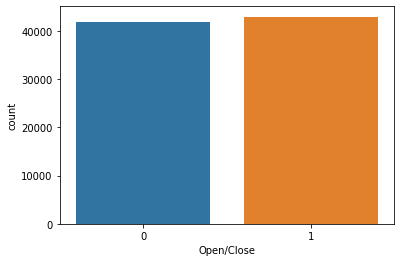

In [7]:
import seaborn as sns
sns.countplot(df['Open/Close'])

<AxesSubplot:ylabel='Open/Close'>

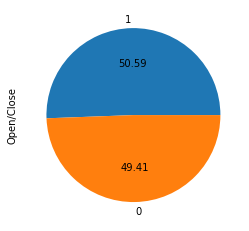

In [8]:
df['Open/Close'].value_counts().plot(kind='pie',autopct='%.2f')

# Step 4: Seperating the data into test and train

In [3]:
count = 1
seperate_data = (r'C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\seperate_data\open')
for dirpath, dirname, filename in os.walk(seperate_data):
    for file in filename:
        if count <= 34361:
            path=(r'C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\data\Train\open')
            if not os.path.exists(path):
                os.makedirs(path)
            shutil.copy(src=dirpath + '/' + file, dst= path)
            count = count+1

In [4]:
count = 1
seperate_data = (r'C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\seperate_data\open')
for dirpath, dirname, filename in os.walk(seperate_data):
    for file in filename:
        if count >=34362 and count<=42952:
            path=(r'C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\data\Test\open')
            if not os.path.exists(path):
                os.makedirs(path)
            shutil.copy(src=dirpath + '/' + file, dst= path)
            count = count+1
        else:
            count = count + 1

In [5]:
# Now we will do the same thing for the closed eyes
count = 1
seperate_data = (r'C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\seperate_data\closed')
for dirpath, dirname, filename in os.walk(seperate_data):
    for file in filename:
        if count <= 33556:
            path=(r'C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\data\Train\closed')
            if not os.path.exists(path):
                os.makedirs(path)
            shutil.copy(src=dirpath + '/' + file, dst= path)
            count = count+1

In [6]:
count = 1
seperate_data = (r'C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\seperate_data\closed')
for dirpath, dirname, filename in os.walk(seperate_data):
    for file in filename:
        if count >=33557 and count<=41946:
            path=(r'C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\data\Test\closed')
            if not os.path.exists(path):
                os.makedirs(path)
            shutil.copy(src=dirpath + '/' + file, dst= path)
            count = count+1
        else:
            count = count + 1

# Step 5: Data Augementation

Data augmentation is a technique used in machine learning to increase the size of a dataset by creating new examples of the data through various transformations. This is done in order to improve the performance of machine learning models by training them on a larger and more diverse dataset.

The basic idea of data augmentation is to generate new examples of the existing data by applying various transformations to it, such as rotation, translation, scaling, flipping, or changing the color balance. For example, in image recognition tasks, one can flip, rotate, or crop images to create new examples of the same object in different orientations or sizes. Similarly, in natural language processing, one can change the word order or replace words with their synonyms to create new examples of text.

The advantage of data augmentation is that it allows the model to see a wider range of data and better generalize to new, unseen data. It can also help to reduce overfitting by introducing randomness and diversity into the training set. However, it is important to note that not all types of data augmentation are suitable for all types of data and tasks, and some types of augmentation may even harm the performance of the model if not done carefully. Therefore, it is important to carefully choose the types of augmentation that are most appropriate for the specific task at hand.
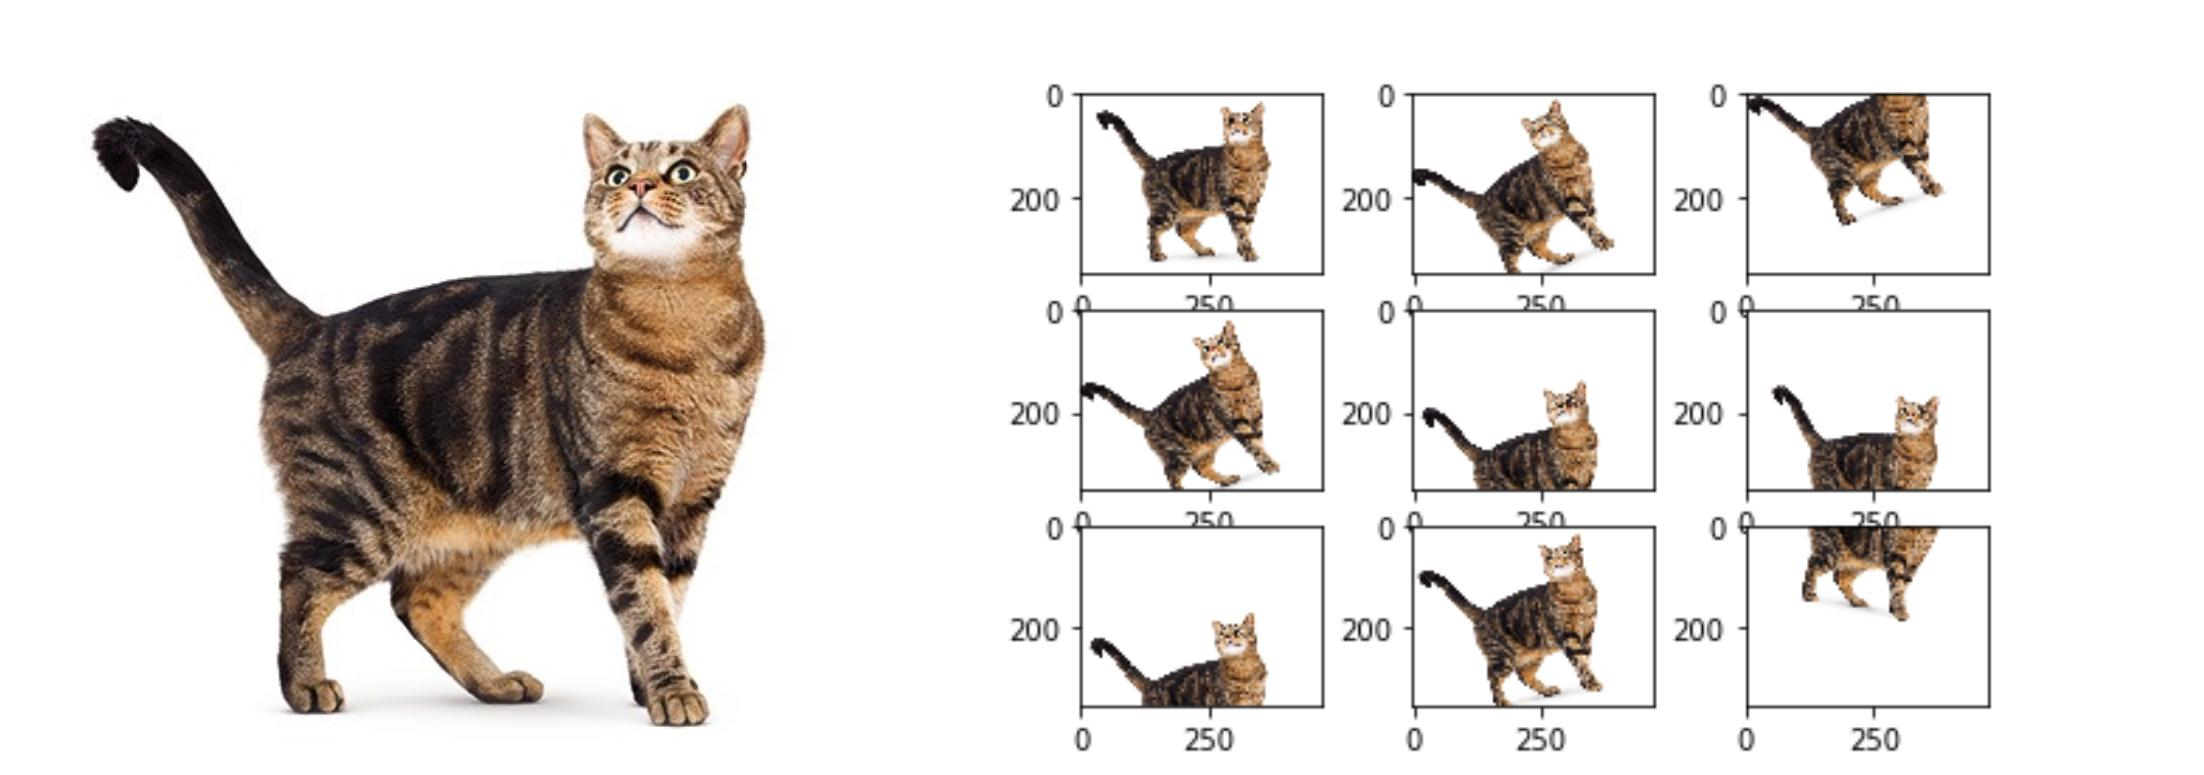

In [2]:
# Setting the batch size
batchsize=8

In [6]:
# Let's create an object of ImageDataGenerator 
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2, validation_split=0.2)

train_data= train_datagen.flow_from_directory(r"C:\Users\YUVRAJ\Desktop\Artificial Intelligence\PROJECTS\Drowzy_detection\data\train_manually",
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical',subset='training' )

validation_data= train_datagen.flow_from_directory(r"C:\Users\YUVRAJ\Desktop\Artificial Intelligence\PROJECTS\Drowzy_detection\data\train_manually",
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical', subset='validation')

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(r"C:\Users\YUVRAJ\Desktop\Artificial Intelligence\PROJECTS\Drowzy_detection\data\test_manually",
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical')

# Step 6: Training InceptionV3 CNN 
Inception V3 is a deep convolutional neural network architecture that was developed by Google in 2015 as an improved version of the earlier Inception V1 and V2 models. It is designed for image recognition and classification tasks and has achieved state-of-the-art results on several benchmark datasets, such as ImageNet.

The Inception V3 architecture uses a combination of convolutional layers, pooling layers, and inception modules to extract features from the input image at different scales and resolutions. Inception modules are composed of multiple parallel convolutional layers with different filter sizes, which allows the network to capture features of different scales and resolutions in a computationally efficient manner.

In addition to the convolutional layers, Inception V3 also includes auxiliary classifiers at intermediate layers, which help to encourage the network to learn discriminative features and prevent overfitting. The final classification layer of Inception V3 uses a softmax function to predict the probability distribution over the classes.
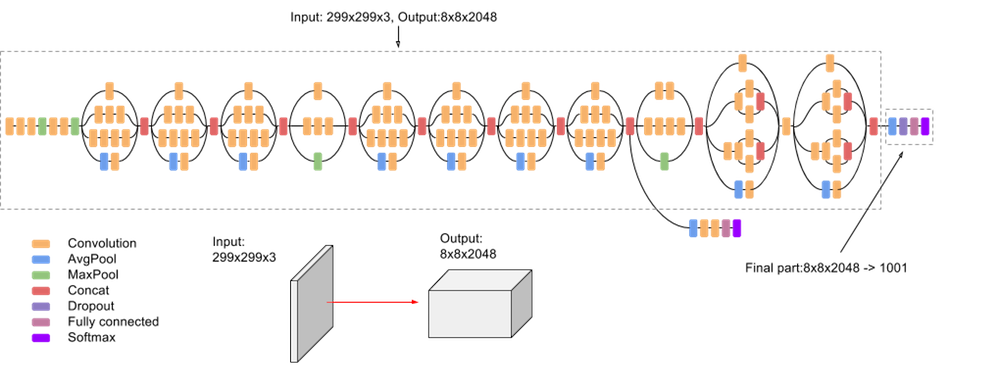

In [9]:
bmodel = InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(80,80,3)))
hmodel = bmodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2,activation= 'softmax')(hmodel)

model = Model(inputs=bmodel.input, outputs= hmodel)
for layer in bmodel.layers:
    layer.trainable = False

In [10]:
# Let's check model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 39, 39, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 39, 39, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 39, 39, 32)   0           ['batch_normalization[0][0]']

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

In [12]:
checkpoint = ModelCheckpoint(r'C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\model3',
                            monitor='val_loss',save_best_only=True,verbose=3)

earlystop = EarlyStopping(monitor = 'val_loss', patience=7, verbose= 3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=3, verbose= 3, )

callbacks=[checkpoint,earlystop,learning_rate]

# Training our Model

In [13]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

model.fit_generator(train_data,steps_per_epoch=train_data.samples//batchsize,
                   validation_data=validation_data,
                   validation_steps=validation_data.samples//batchsize,
                   callbacks=callbacks,
                    epochs=1000)

C:\Users\YUVRAJ\AppData\Local\Temp\ipykernel_26256\2759863133.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data,steps_per_epoch=train_data.samples//batchsize,


Epoch 1/1000
7676/7676 [==============================] - ETA: 0s - loss: 0.2106 - accuracy: 0.9176
Epoch 1: val_loss improved from inf to 0.20508, saving model to C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\model3
INFO:tensorflow:Assets written to: C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\model3\assets
7676/7676 [==============================] - 610s 77ms/step - loss: 0.2106 - accuracy: 0.9176 - val_loss: 0.2051 - val_accuracy: 0.9132 - lr: 0.0010
Epoch 2/1000
7676/7676 [==============================] - ETA: 0s - loss: 0.1813 - accuracy: 0.9288
Epoch 2: val_loss improved from 0.20508 to 0.19522, saving model to C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\model3
INFO:tensorflow:Assets written to: C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Drowzy_detection\model3\assets
7676/7676 [==============================] - 346s 45ms/step - loss: 0.1813 - accuracy: 0.9288 - val_loss: 0.1952 - val_accuracy: 0.9166 - l

In [14]:
# Saving the model
model.save('inceptionv3.h5')

# Step 8: Live feedback

The code uses the prediction values returned by a machine learning model, which is likely a binary classifier that was trained to detect open ,closed eyes as well as head gestures. If the prediction value for open eyes is greater than 0.50, it is assumed that the eyes are open, and the code displays the text "open" on the video frame. The score is then decreased by 1, and if it goes below 0, it is set to 0.

Similarly, if the prediction value for closed eyes is greater than 0.50, it is assumed that the eyes are closed, and the code displays the text "close" on the video frame. The score is then increased by 1, and if it goes above 3, it plays a sound.

### Working of Harcascade
Haar Cascade is a machine learning algorithm used for object detection in images or videos. It works by using a pre-trained model that contains features of a specific object or set of objects, such as human faces, cars, or eyes. The model is trained using a large number of positive and negative examples of the object, and it learns to detect the object by analyzing the features that are most characteristic of it.
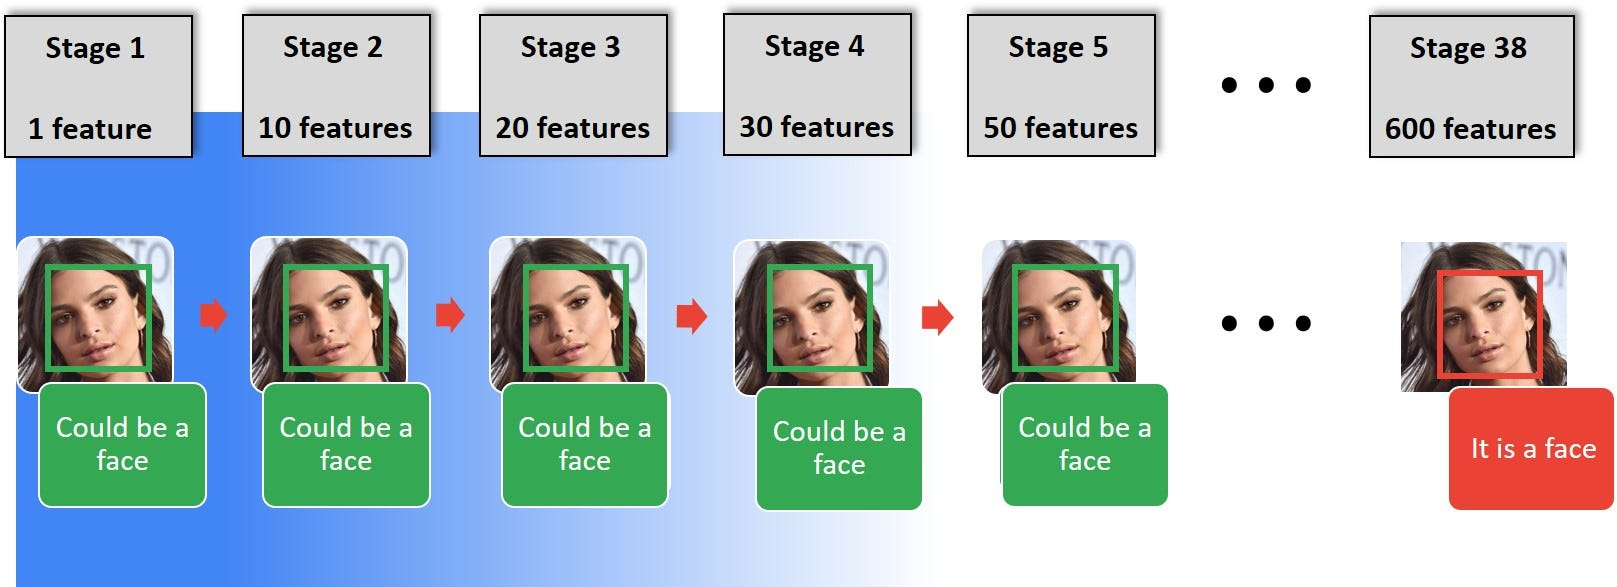

In [16]:
sound= mixer.Sound(r"alarm.wav")
cap = cv2.VideoCapture(1)
Score = 0
while True:
    
    # To read frame from the camera
    ret, frame = cap.read()
    height,width = frame.shape[0:2]
    
    # For converting gray scale of each frame
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # For detecting faces of different size 
    faces= face_cascade.detectMultiScale(gray, scaleFactor= 1.2, minNeighbors=5)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,pt1=(x,y),pt2=(x+w,y+h), color= (255,0,0), thickness=3 )
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = frame[y:y+h,x:x+w]
        
        # For detecting eye of different size 
        eyes= eye_cascade.detectMultiScale(roi_gray, scaleFactor= 1.1, minNeighbors=1)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,pt1=(ex,ey),pt2=(ex+ew,ey+eh), color= (0,255,0), thickness=3 )
        
           
        # preprocessing steps
        eye= frame[ey:ey+eh,ex:ex+w]
        eye= cv2.resize(eye,(80,80))
        eye= eye/255
        eye= eye.reshape(80,80,3)
        eye= np.expand_dims(eye,axis=0)
        
        # preprocessing is done now model prediction
        prediction = model.predict(eye)
        print(prediction)
        
        # If eyes are closed
        if prediction[0][0]>0.50:
            cv2.putText(frame,'open',(10,height-20),fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL,fontScale=1,color=(255,255,255),
                       thickness=1,lineType=cv2.LINE_AA)
            cv2.putText(frame,'Score'+str(Score),(100,height-20),fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL,fontScale=1,color=(255,255,255),
                       thickness=1,lineType=cv2.LINE_AA)
            Score = Score-1
            if Score<0:
                Score = 0
            
            
            
        # if eyes are close
        elif prediction[0][1]>0.50:
            cv2.putText(frame,'close',(10,height-20),fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL,fontScale=1,color=(255,255,255),
                       thickness=1,lineType=cv2.LINE_AA)      
            cv2.putText(frame,'Score'+str(Score),(100,height-20),fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL,fontScale=1,color=(255,255,255),
                       thickness=1,lineType=cv2.LINE_AA)
            Score=Score+1
            if(Score>3):
                try:
                    sound.play()
                except:
                    pass
           
            
        
        
    cv2.imshow('frame',frame)
    if cv2.waitKey(33) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

[[0.5513481 0.4486519]]
[[0.30059946 0.69940054]]
[[0.24048598 0.759514  ]]
[[2.6262455e-06 9.9999738e-01]]
[[0.7031088  0.29689118]]
[[0.9737414  0.02625856]]
[[0.9765465  0.02345344]]
[[0.30922246 0.69077754]]
[[0.99840933 0.00159064]]
[[0.03988636 0.96011364]]
[[0.6705008 0.3294992]]
[[9.9924505e-01 7.5494073e-04]]
[[0.20163712 0.7983629 ]]
[[0.39299035 0.6070096 ]]
[[0.9258553  0.07414477]]
[[0.0049336 0.9950664]]
[[0.20782211 0.7921779 ]]
[[0.37686    0.62314004]]
[[0.98989093 0.01010907]]
[[0.9933767  0.00662339]]
[[0.52773076 0.47226918]]
[[9.994949e-01 5.050700e-04]]
[[0.0062352  0.99376476]]
[[0.01840536 0.9815947 ]]
[[9.902480e-08 9.999999e-01]]
[[0.13236353 0.8676365 ]]
[[0.00306503 0.996935  ]]
[[0.6054249  0.39457512]]
[[0.43577817 0.5642218 ]]
[[0.06480078 0.9351992 ]]
[[9.991881e-01 8.118373e-04]]
[[0.01494717 0.98505276]]
[[0.61521286 0.3847871 ]]
[[0.9304242  0.06957578]]
[[0.73450965 0.26549035]]
[[0.14589682 0.8541032 ]]
[[0.94808644 0.05191353]]
[[0.8753842  0.12461